In [14]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3      # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function:

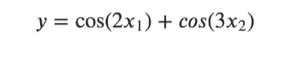

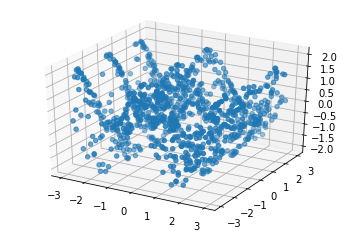

In [16]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [17]:
# Build the model
# One hidden layer with 128 hidden units
# Two inputs and one output
# Since it is regression, there is no activation function
# Eegressing on a single scalar value, so the output dimension is one

model = nn.Sequential(
    nn.Linear(2, 128),       
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [21]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [22]:
# Train the model
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
  # Stuff to store
  train_losses = np.zeros(epochs)

  for it in range(epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[it] = loss.item()

    if (it + 1) % 50 == 0:
      print(f'Epoch {it+1}/{epochs}, Train Loss: {loss.item():.4f}')

  return train_losses
  
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 50/1000, Train Loss: 0.9409
Epoch 100/1000, Train Loss: 0.9406
Epoch 150/1000, Train Loss: 0.9406
Epoch 200/1000, Train Loss: 0.9406
Epoch 250/1000, Train Loss: 0.9406
Epoch 300/1000, Train Loss: 0.9406
Epoch 350/1000, Train Loss: 0.9406
Epoch 400/1000, Train Loss: 0.9406
Epoch 450/1000, Train Loss: 0.9406
Epoch 500/1000, Train Loss: 0.9406
Epoch 550/1000, Train Loss: 0.9406
Epoch 600/1000, Train Loss: 0.9406
Epoch 650/1000, Train Loss: 0.9406
Epoch 700/1000, Train Loss: 0.9406
Epoch 750/1000, Train Loss: 0.9406
Epoch 800/1000, Train Loss: 0.9406
Epoch 850/1000, Train Loss: 0.9406
Epoch 900/1000, Train Loss: 0.9406
Epoch 950/1000, Train Loss: 0.9406
Epoch 1000/1000, Train Loss: 0.9406


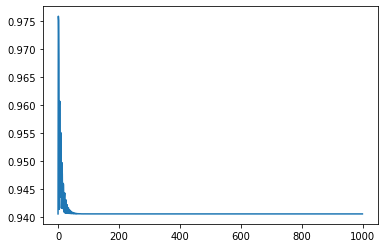

In [29]:
plt.plot(train_losses)

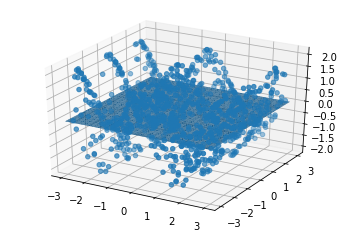

In [30]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()

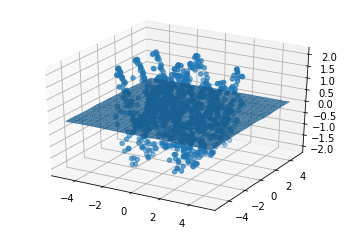

In [32]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
with torch.no_grad():
  line = np.linspace(-5, 5, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()